# Seasonal Decompose


## Omajinai

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12, 6)

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-02-22 16:33:42--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.33.210.126, 13.33.210.24, 13.33.210.11, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.33.210.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105379 (103K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 102.91K  --.-KB/s    in 0.06s   

2022-02-22 16:33:42 (1.79 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [105379/105379]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
df

(768, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,95143,3628,455,277,906,201,257,374,1513,915,...,279,271,4332,453,362,676,378,269,598,702
2022-02-18,87663,2656,590,242,782,216,188,364,1500,774,...,209,222,3738,396,382,707,312,227,483,681
2022-02-19,81576,2797,508,249,836,228,231,325,1527,854,...,216,214,3454,419,370,733,309,215,466,666


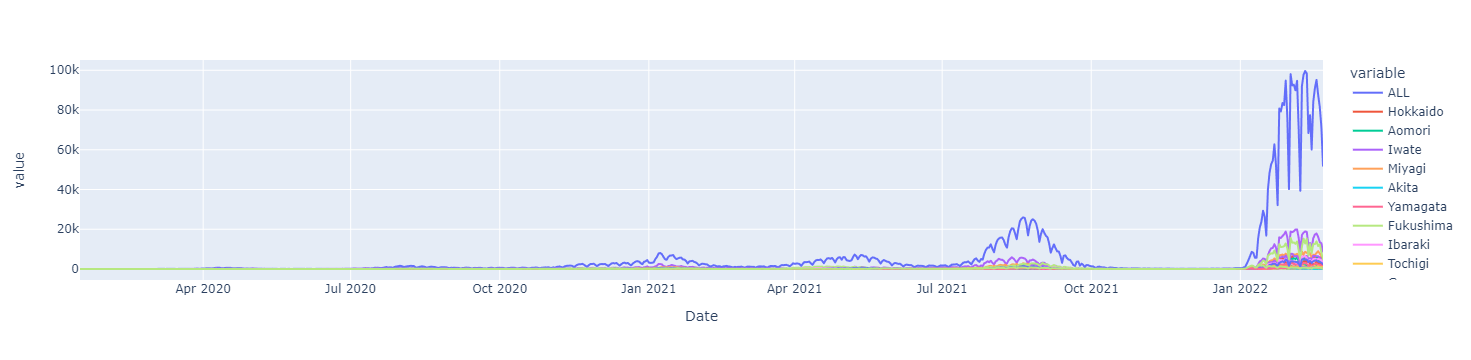

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(1))

(111, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-27,51930,1924,357,213,402,118,129,204,1204,371,...,151,90,2442,306,203,425,243,158,293,315


### weekly

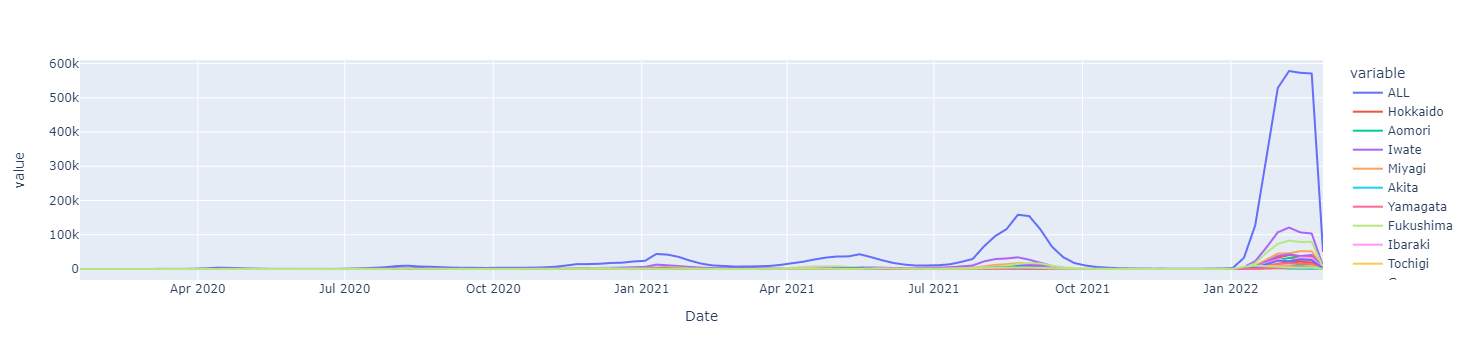

In [7]:
px.line(df_gr,)

## Decompose

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

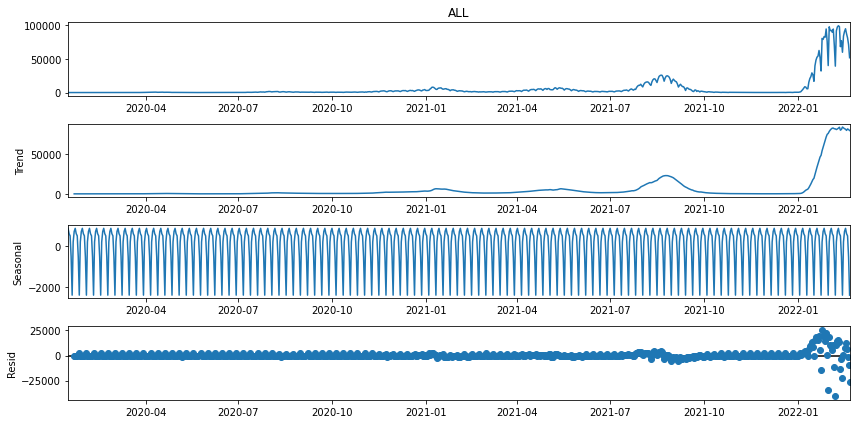

In [9]:
sd = seasonal_decompose(df.ALL, two_sided=False, )#period=7)
fig = sd.plot()

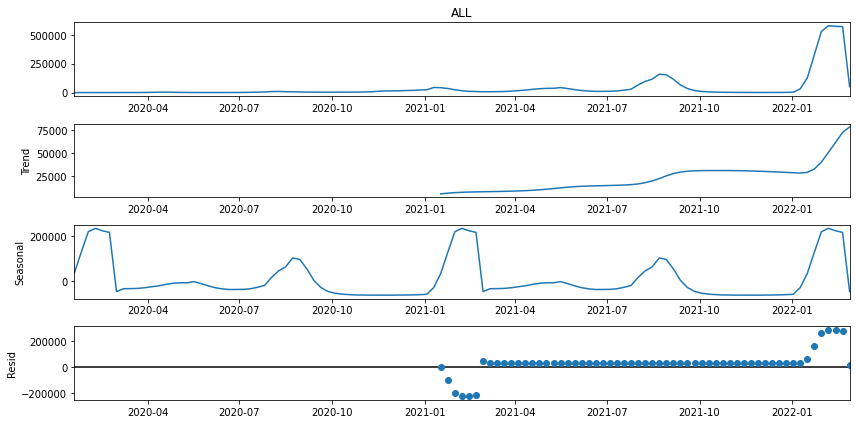

In [10]:
sd = seasonal_decompose(df_gr.ALL, two_sided=False, )#period=12)
fig = sd.plot()